#### Symbolic distribution of $U$ based on $m$ given

In [6]:
%display latex
lam = var('Lambda')
phi = var('Phi')
y = var('y')

# recursion algorithm to find the pmf of U on m-ary tree
def computeU(m):
    U_mat = matrix(SR,m)
    U_mat[0,0] = 1
    
    for j in range(1,m):
        for k in range(j + 1): # if j = 1, k = 0 1
            if k < j:
                U_mat[j,k] = binomial(j,k) * (phi * lam^(k+1))^(j-k) * U_mat[k,k]
            else: # k == j
                U_mat[j,j] = 1 - sum(U_mat[j,i] for i in range(j))
    
    return U_mat[-1,:]

#### Realization for different $m$ and $p=a/b$

Note that we may use continued fraction to find a fraction approximation to a given decimal number. This will give us a smaller constant used later in substitution, and prevent `find_root` (a function used later) from precision problems.

In [7]:
# adjust your m and p = a/b here
m = 4
a = 40
b = 153

# cf = continued_fraction(0.26142)
# cf.convergents() # for choosing the p with small denom. and numer.

In [8]:
# initialization; do not change
p = a / b # should have coprime denominator and numerator
sp = (a*m - a) / (b*m - a*m - a) # star-p

phi = exp((2*a - b) / (b*m - a*m - a)) # as in frog star
lam = y^(b - 2*a)

U_vec = vector(computeU(m))

In [9]:
g(y) = (exp(-sp) * sum(y^((m-1)*(k*a+2*a-b)) * U_vec[k] for k in range(m))).simplify().factor()
g(y)

-(6*y^579 - 6*y^506*e^(73/412) - 6*y^506 - 6*y^459 + 3*y^433*e^(73/412) + 6*y^386*e^(73/412) + 3*y^386 + 3*y^360*e^(73/206) + y^360 + 3*y^266 - 3*y^240*e^(73/206) - 3*y^193*e^(73/412) - y^141*e^(219/412) - 1)*e^(-339/412)

To have the best display of long math equations, right click the math above, then select math settings |> math renderer |> preview html.

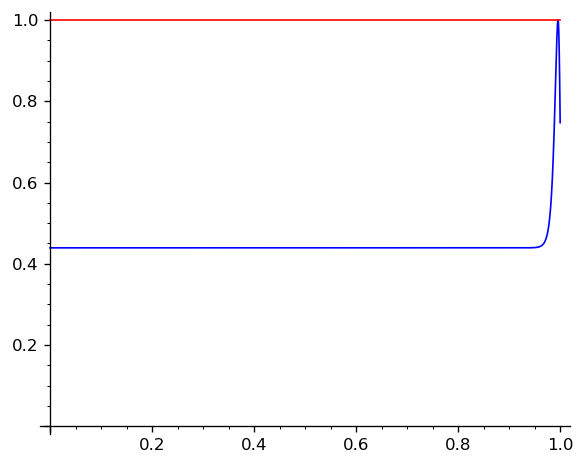

In [10]:
plt = plot(g(y),(y,0,1), ymin = 0, ymax = 1) + plot(1, (y,0,1), ymin = 0, ymax = 1, color = 'red')
plt.show(figsize = [5,4], dpi = 120)
# plt.save('g_y.png', figsize = [5,4], dpi = 300)

In [11]:
dg(y) = diff(g(y)).factor()
dg(y) # at the end we see the multiplicity at 0

-3*(1158*y^438 - 1012*y^365*e^(73/412) - 1012*y^365 - 918*y^318 + 433*y^292*e^(73/412) + 772*y^245*e^(73/412) + 386*y^245 + 360*y^219*e^(73/206) + 120*y^219 + 266*y^125 - 240*y^99*e^(73/206) - 193*y^52*e^(73/412) - 47*e^(219/412))*y^140*e^(-339/412)

In [12]:
mdg = mathematica(dg(y)) # mdg is dg(y) in Mathematica
mdg.CountRoots([y,0,1]) # call CountRoots from Mathematica

141

There seems to be no `CountRoots` equivalent in SageMath. The `find_root` function gives *a* (not *the only*) root of $g(y)$ within the closed interval given using Brent's method. It may run into precision problems if we choose a substitution constant that is too large, which makes $g'(y)$ have extremely large coefficients and exponents for computation. See [this documentation link](https://doc.sagemath.org/html/en/reference/numerical/sage/numerical/optimize.html) for details about `find_root`.

The idea is to import the `CountRoots` function from Mathematica (this requires some setup on the computer), which hopefully helps us determine that for the polynomial function $g'(y)$, there are (1 + multiplicity of the root $y = 0$) on the closed interval $[0,1]$. If that is the case, we know there is exactly one root $y_0$ of $g'(y)$ on $(0,1]$. Then by the steps below, we know that this root is indeed the argmax, with $g(y_0) < 1$.

In [13]:
y0 = dg(y).find_root(0.9,1)
y0

# latex(mdg.FindRoot([y,0.99,0.9,1])) an alternative

0.9957756600409226

In [14]:
g(y0).n() # < 1

0.999863504488442

If $g(y_0) < 1$, then it remains to check if this $y_0$ is indeed the argmax. Here we recall EVT and Fermat's theorem.

If we could check $g(y_0) > g(0)$ and $g(y_0) > g(1)$, then $g$ attains its maximum at $g_0$ on $(0,1]$.

In [22]:
g(0).n() # < g(y0).n() = exp(-(1 - sp) / m * (m - 1) - sp).n()

0.439193348281269

In [20]:
g(1).n() # < g(y_0).n() = exp(-sp).n()

0.747319752986994

To summarize,

In [17]:
print('Under m =', m, 'and p =', p, '~', float(p),'our substitution constant is', (b - a) * (m - 1),'\n\
g(y) reaches its maximum at y =', y0, 'with value', g(y0).n(), '< 1')

Under m = 4 and p = 40/153 ~ 0.26143790849673204 our substitution constant is 339 
g(y) reaches its maximum at y = 0.9957756600409226 with value 0.999863504488442 < 1
